In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
import leidenalg as la
import igraph as ig
import numpy as np
# For BRCA
tsv_file_path = 'BRCA_snv.tsv' 
# For COAD

tsv_file_path = 'COAD_snv.tsv' 
data = pd.read_csv(tsv_file_path, sep='\t')
print(len(pd.Series(data['Tumor_Sample_Barcode']).unique()))
import numpy as np
aa=data.copy()
genedict={}
sample_dict={}
count=0
for i in pd.Series(data['Tumor_Sample_Barcode']).unique():
    sample_dict[i]=count
    count+=1
count=0
#print(sample_dict)
fre=(data['Hugo_Symbol'].value_counts())

dd=list(data['Hugo_Symbol'].value_counts().keys())
finaldd=[]

frecount=0
for i in dd:
    if fre[frecount]>=5:
        finaldd.append(i)
    frecount+=1
for i in finaldd:
    #print(i)
    genedict[i]=count
    count+=1
trackarray=np.zeros((len(sample_dict.items()),len(genedict.items())))
print(trackarray.shape)
for i in range(aa.shape[0]):
    if aa.loc[i,'Hugo_Symbol'] in finaldd:
        trackarray[sample_dict[aa.loc[i,'Tumor_Sample_Barcode']],genedict[aa.loc[i,'Hugo_Symbol']]]=1
finalarr=pd.DataFrame(trackarray,columns=finaldd)
print(finalarr)


984
(984, 8619)
     TTN  PIK3CA  TP53  MUC16  CDH1  GATA3  MAP3K1  KMT2C  RYR2  SYNE1  ...  \
0    0.0     1.0   0.0    0.0   0.0    0.0     0.0    0.0   0.0    0.0  ...   
1    0.0     1.0   0.0    0.0   0.0    1.0     0.0    0.0   1.0    0.0  ...   
2    0.0     1.0   0.0    1.0   0.0    0.0     0.0    0.0   0.0    0.0  ...   
3    0.0     1.0   0.0    0.0   0.0    1.0     0.0    0.0   0.0    0.0  ...   
4    0.0     1.0   0.0    0.0   0.0    0.0     0.0    0.0   0.0    0.0  ...   
..   ...     ...   ...    ...   ...    ...     ...    ...   ...    ...  ...   
979  0.0     0.0   0.0    0.0   0.0    0.0     0.0    0.0   0.0    0.0  ...   
980  1.0     1.0   1.0    1.0   1.0    0.0     0.0    0.0   0.0    1.0  ...   
981  1.0     0.0   1.0    0.0   0.0    0.0     0.0    0.0   0.0    0.0  ...   
982  0.0     1.0   0.0    0.0   0.0    0.0     0.0    0.0   0.0    0.0  ...   
983  1.0     1.0   0.0    0.0   0.0    1.0     0.0    0.0   0.0    0.0  ...   

     GUCA1A  ZNF556  GDAP1L1  C8A  

In [47]:
import pandas as pd
a=pd.read_csv("BRCA_miRNA.tsv",delimiter="\t")
bb=pd.DataFrame(columns=list(a['miRNA_ID'].unique()),index=(a['Sample ID'].unique()))
cc=pd.DataFrame(columns=list(a['miRNA_ID'].unique()),index=(a['Sample ID'].unique()))
for i in range(a.shape[0]):
    bb.loc[a.iloc[i,4],a.iloc[i,0]]=a.iloc[i,1]
    cc.loc[a.iloc[i,4],a.iloc[i,0]]=a.iloc[i,2]
bb=bb.astype(float)
cc=cc.astype(float)


# Creating my pipeline

# Encoding my data

In [2]:
mydata=data.copy()
mydata['SIFT_pred']=mydata['SIFT_pred'].replace(['D','T',np.nan],[1,0,0]).astype('int64')
mydata['Polyphen2_HDIV_pred']=mydata['Polyphen2_HDIV_pred'].replace(['D','P','B',np.nan],[1,0.5,0,0]).astype('int64')
mydata['Polyphen2_HVAR_pred']=mydata['Polyphen2_HVAR_pred'].replace(['D','P','B',np.nan],[1,0.5,0,0]).astype('int64')
mydata['LRT_pred']=mydata['LRT_pred'].replace(['D','N','U',np.nan],[1,0,0,0]).astype('int64')
mydata['MutationTaster_pred']=mydata['MutationTaster_pred'].replace(['A','D','N','P',np.nan],[1,1,0.5,0,0]).astype('int64')
mydata['MutationAssessor_pred']=mydata['MutationAssessor_pred'].replace(['H','M','L','N',np.nan],[1,1,0,0,0]).astype('int64')
mydata['FATHMM_pred']=mydata['FATHMM_pred'].replace(['D','T',np.nan],[1,0,0]).astype('int64')
mydata['PROVEAN_pred']=mydata['PROVEAN_pred'].replace(['D','N',np.nan],[1,0,0]).astype('int64')
mydata['MetaSVM_pred']=mydata['MetaSVM_pred'].replace(['D','T',np.nan],[1,0,0]).astype('int64')
mydata['MetaLR_pred']=mydata['MetaLR_pred'].replace(['D','T',np.nan],[1,0,0]).astype('int64')
mydata=mydata[mydata['Hugo_Symbol'].isin(finaldd)]
mydata['SIFT_pred'].value_counts()
granli=['SIFT_pred','Polyphen2_HDIV_pred','Polyphen2_HVAR_pred','LRT_pred','MutationTaster_pred','MutationAssessor_pred',
       'FATHMM_pred','PROVEAN_pred','MetaSVM_pred','MetaLR_pred']


In [3]:
count=0
for scoretest in granli:
    temp_matrix= mydata.pivot_table(index='Tumor_Sample_Barcode', columns='Hugo_Symbol', values=scoretest, aggfunc='max').fillna(0)
    if count==0:

        feature_matrix=temp_matrix
    else:
  
        feature_matrix+=temp_matrix
    count+=1
def adjacency_to_igraph(matrix):

    g = ig.Graph.Weighted_Adjacency(matrix.to_numpy().tolist(), mode=ig.ADJ_MAX, attr="weight", loops=False)
    return g
df=feature_matrix.copy()
df_filtered_rows = df[(df.sum(axis=1) != 0)]

print(df_filtered_rows.shape)

df_filtered_columns =  df_filtered_rows.loc[:, df_filtered_rows.sum() > 0]
print(df_filtered_columns.shape)

df=df_filtered_columns.copy()

(983, 8619)
(983, 8284)


# Trying all possible alternatives: 

# Without Bipartite

In [13]:
mahali=[]
for j in [0.1,0.15,0.2,0.25,0.3]:
    count=0
    for scoretest in granli:
        temp_matrix= mydata.pivot_table(index='Tumor_Sample_Barcode', columns='Hugo_Symbol', values=scoretest, aggfunc='max').fillna(0)
        if count==0:
            #temp_matrix=1-temp_matrix
            feature_matrix=temp_matrix
        else:
            #temp_matrix=1-temp_matrix
            feature_matrix+=temp_matrix
        count+=1
    def adjacency_to_igraph(matrix):
 
        g = ig.Graph.Weighted_Adjacency(matrix.to_numpy().tolist(), mode=ig.ADJ_MAX, attr="weight", loops=False)
        return g
    df=feature_matrix.copy()
    df_filtered_rows = df[(df.sum(axis=1) != 0)]

    print(df_filtered_rows.shape)
    #df_filtered_columns = df_filtered_rows.loc[:, (df_filtered_rows != 0).any(axis=0)]
    df_filtered_columns =  df_filtered_rows.loc[:, df_filtered_rows.sum() > 0]
    print(df_filtered_columns.shape)
    '''data_matrix = df_filtered_columns.values
    #co_occurrence_matrix = np.abs(np.array(df_filtered_columns.T.corr()))
    co_occurrence_matrix=np.dot(df_filtered_columns,df_filtered_columns.transpose())
    gene_names = df_filtered_columns.index
    co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=gene_names, columns=gene_names)
    g = adjacency_to_igraph(co_occurrence_df)'''
    df=df_filtered_columns.copy()
    import pandas as pd
    import numpy as np
    from sklearn.metrics import mutual_info_score
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.metrics import silhouette_score
    from scipy.spatial.distance import pdist, squareform

    
    def aggregate_data(data_sources):
        aggregated_data = pd.DataFrame(index=data_sources[0].index, columns=data_sources[0].columns)
        for df in data_sources:
            aggregated_data += df
        return aggregated_data


    def select_features(data, threshold=0.05):
        selected_features = []
        for col in data.columns:
            mi_score = mutual_info_score(data[col], data.sum(axis=1))  # Score based on co-occurrence with other mutations
            if mi_score >= threshold:
                selected_features.append(col)
        return data[selected_features]

    def generalized_tanimoto(u, v):
        numerator = np.dot(u, v)
        denominator = np.dot(u, u) + np.dot(v, v) - numerator
        return 1 - numerator / denominator if denominator != 0 else 0


    def hierarchical_clustering(data, n_clusters=5):
     
        pairwise_similarities = np.array([[generalized_tanimoto(u, v) for v in data.values] for u in data.values])
       

      
        pairwise_distances = 1 - pairwise_similarities
        
        return pairwise_distances


    def cluster_samples(data_sources, n_clusters=5, feature_threshold=0.1):
        
        aggregated_data = data_sources
       
        features_selected = select_features(aggregated_data, threshold=feature_threshold)
      
        cluster_labels = hierarchical_clustering(features_selected, n_clusters=n_clusters)
  
        return  cluster_labels

    
    cluster_labels = cluster_samples(df_filtered_columns, n_clusters=5, feature_threshold=j)

    cluster_labels=pd.DataFrame(cluster_labels,index=df_filtered_columns.index)
    print(cluster_labels)
    df=cluster_labels.copy()
    g = ig.Graph()

    g = ig.Graph.Weighted_Adjacency(cluster_labels.to_numpy().tolist(), mode=ig.ADJ_UNDIRECTED)
    print(g.summary())
    if 'weight' not in g.es.attributes():
        raise Exception("Edge weights are missing!")
    is_bipartite, bipartite_types = g.is_bipartite(return_types=True)
    #print("Is the graph bipartite?", is_bipartite)
    #print("Vertex types:", bipartite_types)
    import leidenalg as la


    def apply_leiden_with_min_size(graph, min_cluster_size=10):
        partition = la.find_partition(graph, la.ModularityVertexPartition, weights="weight")
        membership = np.array(partition.membership)
        adjacency_matrix = np.array(graph.get_adjacency().data)

        for i in range(len(membership)):
            cluster_id = membership[i]
            cluster_size = np.sum(membership == cluster_id)

            if cluster_size < min_cluster_size:
  
                neighbors = np.array(graph.neighbors(i))
                if len(neighbors) == 0:
                    continue  

                neighbor_clusters = membership[neighbors]

            
                if not len(neighbor_clusters):
                    continue

                
                unique, counts = np.unique(neighbor_clusters, return_counts=True)
                most_common_cluster = unique[np.argmax(counts)]

          
                membership[i] = most_common_cluster

        return membership

        return membership

  
    partition = apply_leiden_with_min_size(g, min_cluster_size=5)

    membership = partition


    print("Number of clusters:", len(set(membership)))
    print(pd.Series(membership).value_counts())
    mahali.append(membership)
    from sklearn.cluster import Birch


    birch_model = Birch(n_clusters=4)


    birch_model.fit(cluster_labels)


    labels = birch_model.predict(cluster_labels)
    mahali.append(labels)



(983, 8619)
(983, 8284)
                              0         1         2         3         4    \
Tumor_Sample_Barcode                                                        
TCGA-3C-AAAU-01A-11D-A41F-09  1.0  0.000000  0.000000  0.000000  0.000000   
TCGA-3C-AALI-01A-11D-A41F-09  0.0  1.000000  0.017857  0.006925  0.037707   
TCGA-3C-AALJ-01A-31D-A41F-09  0.0  0.017857  1.000000  0.000000  0.000000   
TCGA-3C-AALK-01A-11D-A41F-09  0.0  0.006925  0.000000  1.000000  0.056818   
TCGA-4H-AAAK-01A-12D-A41F-09  0.0  0.037707  0.000000  0.056818  1.000000   
...                           ...       ...       ...       ...       ...   
TCGA-WT-AB44-01A-11D-A41F-09  0.0  0.000000  0.000000  0.000000  0.000000   
TCGA-XX-A899-01A-11D-A36J-09  0.0  0.000000  0.000000  0.190476  0.028571   
TCGA-XX-A89A-01A-11D-A36J-09  0.0  0.099312  0.000000  0.060852  0.002070   
TCGA-Z7-A8R5-01A-42D-A41F-09  0.0  0.000000  0.000000  0.114650  0.000000   
TCGA-Z7-A8R6-01A-11D-A41F-09  0.0  0.016000  0.00000

Number of clusters: 4
0    297
1    257
2    240
3    189
dtype: int64
(983, 8619)
(983, 8284)
                              0         1         2         3    4    \
Tumor_Sample_Barcode                                                   
TCGA-3C-AAAU-01A-11D-A41F-09  1.0  0.000000  0.000000  0.000000  1.0   
TCGA-3C-AALI-01A-11D-A41F-09  0.0  1.000000  0.051282  0.000000  0.0   
TCGA-3C-AALJ-01A-31D-A41F-09  0.0  0.051282  1.000000  0.000000  0.0   
TCGA-3C-AALK-01A-11D-A41F-09  0.0  0.000000  0.000000  1.000000  0.0   
TCGA-4H-AAAK-01A-12D-A41F-09  1.0  0.000000  0.000000  0.000000  1.0   
...                           ...       ...       ...       ...  ...   
TCGA-WT-AB44-01A-11D-A41F-09  1.0  0.000000  0.000000  0.000000  1.0   
TCGA-XX-A899-01A-11D-A36J-09  0.0  0.000000  0.000000  0.428571  0.0   
TCGA-XX-A89A-01A-11D-A36J-09  0.0  0.000000  0.000000  0.967742  0.0   
TCGA-Z7-A8R5-01A-42D-A41F-09  0.0  0.000000  0.000000  0.666667  0.0   
TCGA-Z7-A8R6-01A-11D-A41F-09  0.0  0.0584

# Bipartite Analysis

In [53]:
mahali3=[]
for j in [0.1,0.15,0.2,0.25,0.3]:
    count=0
    for scoretest in granli:
        temp_matrix= mydata.pivot_table(index='Tumor_Sample_Barcode', columns='Hugo_Symbol', values=scoretest, aggfunc='max').fillna(0)
        if count==0:
            #temp_matrix=1-temp_matrix
            feature_matrix=temp_matrix
        else:
            #temp_matrix=1-temp_matrix
            feature_matrix+=temp_matrix
        count+=1
    def adjacency_to_igraph(matrix):
   
        g = ig.Graph.Weighted_Adjacency(matrix.to_numpy().tolist(), mode=ig.ADJ_MAX, attr="weight", loops=False)
        return g
    df=feature_matrix.copy()
    df_filtered_rows = df[(df.sum(axis=1) != 0)]

    print(df_filtered_rows.shape)
    #df_filtered_columns = df_filtered_rows.loc[:, (df_filtered_rows != 0).any(axis=0)]
    df_filtered_columns =  df_filtered_rows.loc[:, df_filtered_rows.sum() > 0]
    print(df_filtered_columns.shape)
    '''data_matrix = df_filtered_columns.values
    #co_occurrence_matrix = np.abs(np.array(df_filtered_columns.T.corr()))
    co_occurrence_matrix=np.dot(df_filtered_columns,df_filtered_columns.transpose())
    gene_names = df_filtered_columns.index
    co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=gene_names, columns=gene_names)
    g = adjacency_to_igraph(co_occurrence_df)'''
    df=df_filtered_columns.copy()
    import pandas as pd
    import numpy as np
    from sklearn.metrics import mutual_info_score
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.metrics import silhouette_score
    from scipy.spatial.distance import pdist, squareform

   
    def aggregate_data(data_sources):
        aggregated_data = pd.DataFrame(index=data_sources[0].index, columns=data_sources[0].columns)
        for df in data_sources:
            aggregated_data += df
        return aggregated_data


    def select_features(data, threshold=0.05):
        selected_features = []
        for col in data.columns:
            mi_score = mutual_info_score(data[col], data.sum(axis=1))  # Score based on co-occurrence with other mutations
            if mi_score >= threshold:
                selected_features.append(col)
        return data[selected_features]


    def generalized_tanimoto(u, v):
        numerator = np.dot(u, v)
        denominator = np.dot(u, u) + np.dot(v, v) - numerator
        return 1 - numerator / denominator if denominator != 0 else 0


    def hierarchical_clustering(data, n_clusters=5):

        pairwise_similarities = np.array([[generalized_tanimoto(u, v) for v in data.values] for u in data.values])
        pairwise_distances = 1 - pairwise_similarities
        
        return pairwise_distances


    def cluster_samples(data_sources, n_clusters=5, feature_threshold=0.1):

        aggregated_data = data_sources
        features_selected = select_features(aggregated_data, threshold=feature_threshold)

        return features_selected

  
    cluster_labels = cluster_samples(df_filtered_columns, n_clusters=5, feature_threshold=j)

    
    print(cluster_labels)
    df=cluster_labels.copy()
    g = ig.Graph()
    g = g.Biadjacency(df.to_numpy(),weighted=True)

    print(g.summary())
    if 'weight' not in g.es.attributes():
        raise Exception("Edge weights are missing!")
    is_bipartite, bipartite_types = g.is_bipartite(return_types=True)

    import leidenalg as la
    proj0, proj1 = g.bipartite_projection()
    
    def apply_leiden_with_min_size(graph, min_cluster_size=10):
        partition = la.find_partition(graph, la.ModularityVertexPartition, weights="weight")
        membership = np.array(partition.membership)
        adjacency_matrix = np.array(graph.get_adjacency().data)
    
        for i in range(len(membership)):
            cluster_id = membership[i]
            cluster_size = np.sum(membership == cluster_id)

            if cluster_size < min_cluster_size:
               
                neighbors = np.array(graph.neighbors(i))
                if len(neighbors) == 0:
                    continue  

                neighbor_clusters = membership[neighbors]

           
                if not len(neighbor_clusters):
                    continue

                
                unique, counts = np.unique(neighbor_clusters, return_counts=True)
                most_common_cluster = unique[np.argmax(counts)]

        
                membership[i] = most_common_cluster

        return membership

        return membership


    partition = apply_leiden_with_min_size(proj0, min_cluster_size=5)

    membership = partition


    print("Number of clusters:", len(set(membership)))
    print(pd.Series(membership).value_counts())
    mahali3.append(membership)
    from sklearn.cluster import Birch

  
    birch_model = Birch(n_clusters=4)
    adj_matrix = proj0.get_adjacency(attribute='weight')

    birch_model.fit(adj_matrix)
    

    labels = birch_model.predict(adj_matrix)
    mahali3.append(labels)



(983, 8619)
(983, 8284)
Hugo_Symbol                   ABCA13  ADGRV1  AHCTF1  AHNAK  ANK2  ANK3  APOB  \
Tumor_Sample_Barcode                                                            
TCGA-3C-AAAU-01A-11D-A41F-09     0.0     0.0     0.0    0.0   0.0   0.0   0.0   
TCGA-3C-AALI-01A-11D-A41F-09     0.0     0.0     2.0    3.0   0.0   0.0   1.0   
TCGA-3C-AALJ-01A-31D-A41F-09     0.0     0.0     0.0    0.0   0.0   0.0   0.0   
TCGA-3C-AALK-01A-11D-A41F-09     0.0     0.0     0.0    0.0   0.0   0.0   0.0   
TCGA-4H-AAAK-01A-12D-A41F-09     0.0     0.0     0.0    0.0   0.0   0.0   0.0   
...                              ...     ...     ...    ...   ...   ...   ...   
TCGA-WT-AB44-01A-11D-A41F-09     0.0     0.0     0.0    0.0   0.0   0.0   0.0   
TCGA-XX-A899-01A-11D-A36J-09     0.0     0.0     0.0    0.0   0.0   0.0   0.0   
TCGA-XX-A89A-01A-11D-A36J-09     0.0     0.0     0.0    0.0   0.0   0.0   0.0   
TCGA-Z7-A8R5-01A-42D-A41F-09     0.0     0.0     0.0    0.0   0.0   0.0   0.0   
TCGA

Number of clusters: 300
0      267
1      233
2      186
197      1
204      1
      ... 
101      1
100      1
99       1
98       1
299      1
Length: 300, dtype: int64
(983, 8619)
(983, 8284)
Hugo_Symbol                   MUC16  PIK3CA  RYR2  TP53  TTN
Tumor_Sample_Barcode                                        
TCGA-3C-AAAU-01A-11D-A41F-09    0.0     0.0   0.0   0.0  0.0
TCGA-3C-AALI-01A-11D-A41F-09    0.0     0.0   8.0   1.0  4.0
TCGA-3C-AALJ-01A-31D-A41F-09    0.0     0.0   0.0   0.0  1.0
TCGA-3C-AALK-01A-11D-A41F-09    0.0     6.0   0.0   0.0  0.0
TCGA-4H-AAAK-01A-12D-A41F-09    0.0     0.0   0.0   0.0  0.0
...                             ...     ...   ...   ...  ...
TCGA-WT-AB44-01A-11D-A41F-09    0.0     0.0   0.0   0.0  0.0
TCGA-XX-A899-01A-11D-A36J-09    0.0     2.0   0.0   0.0  0.0
TCGA-XX-A89A-01A-11D-A36J-09    0.0     5.0   0.0   0.0  0.0
TCGA-Z7-A8R5-01A-42D-A41F-09    0.0     3.0   0.0   0.0  0.0
TCGA-Z7-A8R6-01A-11D-A41F-09    0.0     0.0   0.0  10.0  0.0

[983 rows x

# towards consensus clustering

In [10]:
import numpy as np


m = len(mahali[0])  


co_occurrence_matrix = np.zeros((m, m))


for i in range(m):
    for j in range(i+1, m):
        for k in range(len(mahali)):
            if mahali[k][i] == mahali[k][j]:
                co_occurrence_matrix[i][j] += 1
                co_occurrence_matrix[j][i] += 1
            


threshold = 1  
print(co_occurrence_matrix)

def merge_samples(threshold):

    clusters = {i: [i] for i in range(m)}
    

    for i in range(m):
        for j in range(i+1, m):
            if co_occurrence_matrix[i][j] >= threshold:
                clusters[i].extend(clusters[j])
                clusters[j] = []
    

    clusters = {k: v for k, v in clusters.items() if v}
    
    return clusters


final_clusters = merge_samples(threshold)


print(final_clusters)


[[0. 3. 3. ... 2. 0. 0.]
 [3. 0. 6. ... 2. 0. 0.]
 [3. 6. 0. ... 2. 0. 0.]
 ...
 [2. 2. 2. ... 0. 4. 0.]
 [0. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{0: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 19, 20, 21, 23, 24, 26, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63, 67, 70, 71, 72, 73, 76, 77, 78, 79, 81, 82, 83, 85, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 104, 106, 108, 109, 113, 120, 122, 127, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 142, 147, 148, 149, 150, 151, 153, 155, 156, 158, 159, 160, 161, 162, 163, 167, 168, 169, 171, 172, 173, 174, 175, 176, 179, 180, 184, 185, 188, 189, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 208, 209, 210, 211, 213, 215, 216, 221, 222, 223, 224, 227, 229, 230, 231, 232, 234, 236, 237, 239, 241, 242, 244, 246, 248, 249, 250, 251, 254, 256, 258, 259, 260, 262, 263, 264, 265, 266, 268, 269, 270, 271, 275, 278, 279, 280, 283, 

[[0.         0.66666667 0.66666667 ... 0.66666667 1.         1.        ]
 [0.66666667 0.         0.         ... 0.         1.         1.        ]
 [0.66666667 0.         0.         ... 0.         1.         1.        ]
 ...
 [0.66666667 0.         0.         ... 0.         1.         1.        ]
 [1.         1.         1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 1.         1.         0.        ]]
[ 6 10 10  1 10 10 10 14 12 10 10 17 10  3  5  3 10 10  3  3 12  1  1 18
 10  3  8  1  3 12 18 10  3 17  1 18 10  1 10 10 12 12 10  3  1 18  1 17
  1 10  1 14 10 10  5 18 18  1  1  1  3  3 10 10  3  3 10 10  3  3 14  1
  7  9  1  1 10 14 18 17  3  6  3 10  1 14  3 18 10 10  1  1 10 10 10 18
 10 10  1 14 10  5  5  3  5  3  5  3 10 10  3  1  3 10 10  1  3  1  3  1
  3  3 10  1  3  1 18 10 10 17 10  3  3 10  1  2 10  3  3 18  3  1  3  1
 10  1 10 17  9  1 10  3 10 16  1 10 10 18  3 10 10  3  1  3 10 18 10  1
 10 10 17 10 14 10  1  1 10 10  1  3  1 12 10

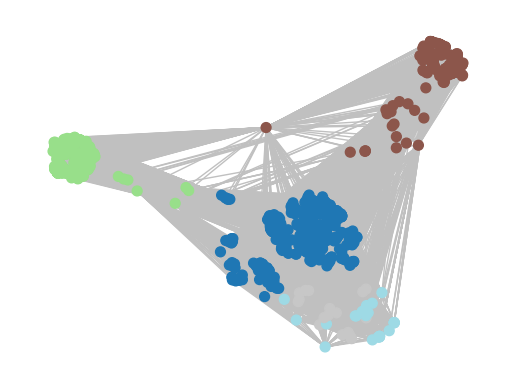

In [25]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform


distance_matrix = 1 - (co_occurrence_matrix / np.max(co_occurrence_matrix))
np.fill_diagonal(distance_matrix, 0)
print(distance_matrix)

condensed_distance_matrix = squareform(distance_matrix)


Z = linkage(condensed_distance_matrix, method='average')

max_d = 0.5
clusters = fcluster(Z, max_d, criterion='distance')

print(clusters)
import networkx as nx
import markov_clustering as mc


G = nx.from_numpy_matrix(co_occurrence_matrix)


result = mc.run_mcl(co_occurrence_matrix)
clusters = mc.get_clusters(result)


cluster_mapping = {node: cluster_id for cluster_id, cluster in enumerate(clusters) for node in cluster}

print(cluster_mapping)
mc.draw_graph(co_occurrence_matrix, clusters, node_size=50, with_labels=False, edge_color="silver")